# 12/14
In this notebook, I am trying to put together the most wide reaching query to fetch wildfire data. The goal is to get as many tweets as possible that may denote a signal from the wildfire data. To do this, I want to carefully 

In [8]:
from searchTwitter import TwitterSearchTerm
import pandas as pd
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import utils as ut

In [5]:
# Let's start with this base model
words = [
    "(fire haze)",
    "(smoke fire)",
    "(wild fire)",
    "wildfire",
    "(forest fire)",
]
query_term = "("+" OR ".join(words)+") -has:links -is:retweet has:geo -has:media place_country:us"
searchQuery = TwitterSearchTerm(query_term, "2018-01-01T00:00:00z","2021-10-01T00:00:00z")
standard_df = searchQuery.get_term_count()

Total tweets for query ((fire haze) OR (smoke fire) OR (wild fire) OR wildfire OR (forest fire)) -has:links -is:retweet has:geo -has:media place_country:us :
41923


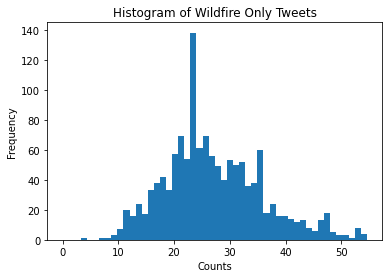

In [6]:
import matplotlib.pyplot as plt
plt.hist(standard_df['tweet_count'], bins=50, range=(0,np.percentile(standard_df['tweet_count'],95)))
plt.title("Histogram of Wildfire Only Tweets")
plt.xlabel("Tweets per day")
plt.ylabel("Frequency")
plt.show()

Standard


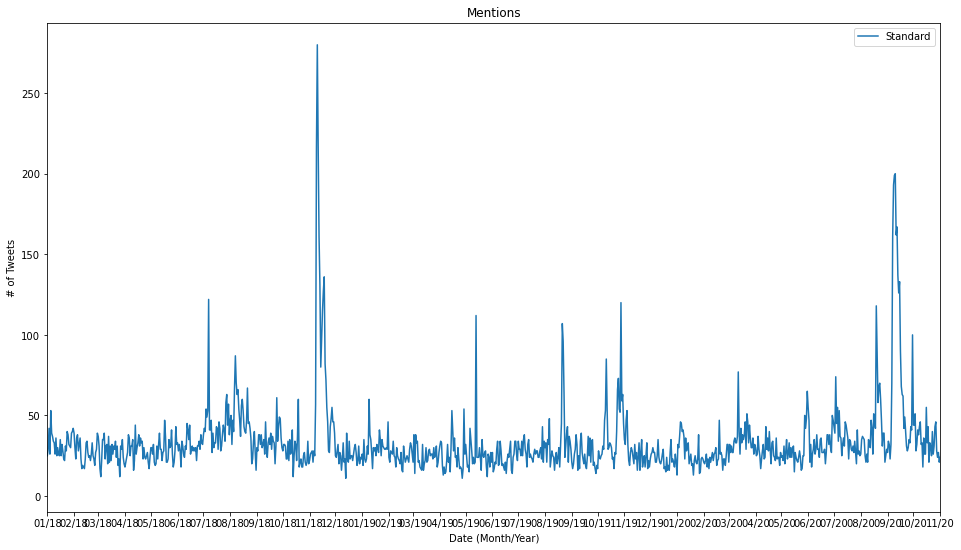

In [7]:
from datetime import datetime
import utils as ut
ut.graph_tweet_count([standard_df],datetime(2018,1,1), datetime(2020,11,1), labels=['Standard'])

In [5]:
# Let's try the simplest query
words = [
#     "(fire haze)",
#     "(smoke fire)",
#     "(wild fire)",
    "wildfire",
    "(forest fire)",
]
query_term = "("+" OR ".join(words)+") -has:links -is:retweet has:geo -has:media place_country:us"
searchQuery = TwitterSearchTerm(query_term, "2018-01-01T00:00:00z","2021-10-01T00:00:00z")
simple_df = searchQuery.get_term_count()

Total tweets for query (wildfire OR (forest fire)) -has:links -is:retweet has:geo -has:media place_country:us :
17312


Standard
Simple WF


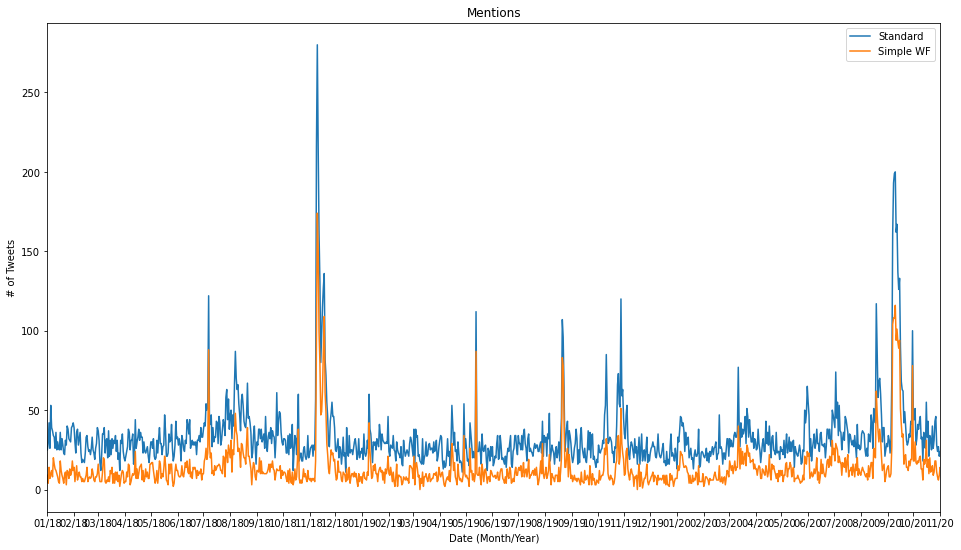

In [43]:
ut.graph_tweet_count([standard_df,simple_df],datetime(2018,1,1), datetime(2020,11,1), labels=['Standard', 'Simple WF'])

So, in general, it looks like the more complex query does covary with the simpler, reduced query. Let's see if we can make this signal as distinct as possible. We want to keep the noise minimal while increasing the signal.

In [10]:
# Now let's try the more complex query
words = [
    "((fire OR fires) ash)",
    "((fire OR fires) particulate)",
    "((fire OR fires) air pollution)",
    "((fire OR fires) air quality)",
    "((fire OR fires) smog)",
    "((fire OR fires) haze)",
    "(smoke (fire OR fires))",
    "(wild (fire OR fires))",
    "wildfire",
    "wildfires",
    "(forest (fire OR fires))"
]
query_term = "("+" OR ".join(words)+") -has:links -is:retweet has:geo -has:media place_country:us"
searchQuery = TwitterSearchTerm(query_term, "2018-01-01T00:00:00z","2021-10-01T00:00:00z")
complex_df = searchQuery.get_term_count()

Total tweets for query (((fire OR fires) ash) OR ((fire OR fires) particulate) OR ((fire OR fires) air pollution) OR ((fire OR fires) air quality) OR ((fire OR fires) smog) OR ((fire OR fires) haze) OR (smoke (fire OR fires)) OR (wild (fire OR fires)) OR wildfire OR wildfires OR (forest (fire OR fires))) -has:links -is:retweet has:geo -has:media place_country:us :
66726


Standard
Complex WF
Simple DF


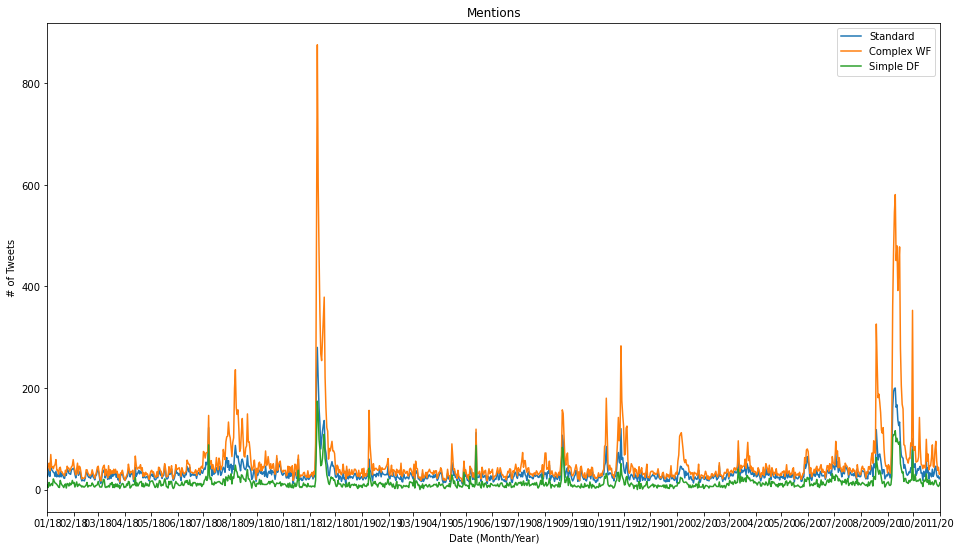

In [11]:
ut.graph_tweet_count([standard_df,complex_df, simple_df],datetime(2018,1,1), datetime(2020,11,1), labels=['Standard', 'Complex WF', 'Simple DF'])

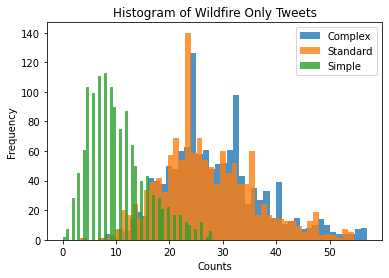

In [48]:
import matplotlib.pyplot as plt
plt.hist(complex_df['tweet_count'], bins=50, range=(0,np.percentile(complex_df['tweet_count'],95)), alpha=0.8, label="Complex")
plt.hist(standard_df['tweet_count'], bins=50, range=(0,np.percentile(standard_df['tweet_count'],95)), alpha=0.8, label="Standard")
plt.hist(simple_df['tweet_count'], bins=50, range=(0,np.percentile(simple_df['tweet_count'],95)), alpha=0.8, label="Simple")
plt.title("Histogram of Wildfire Only Tweets")
plt.xlabel("# of Tweets per Day")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [53]:
# Let's see what happens when we just remove that scary "smoke" word
# Now let's try the more complex query
words = [
    "(fire ash)",
    "(fire particulate)",
    "(fire air pollution)",
    "(fire air quality)",
    "(fire smog)",
    "(fire haze)",
#     "(smoke fire)",
    "(wild fire)",
    "wildfire",
    "(forest fire)"
]
query_term = "("+" OR ".join(words)+") -has:links -is:retweet has:geo -has:media place_country:us"
searchQuery = TwitterSearchTerm(query_term, "2018-01-01T00:00:00z","2021-10-01T00:00:00z")
complex_df_2 = searchQuery.get_term_count()

Total tweets for query ((fire ash) OR (fire particulate) OR (fire air pollution) OR (fire air quality) OR (fire smog) OR (fire haze) OR (wild fire) OR wildfire OR (forest fire)) -has:links -is:retweet has:geo -has:media place_country:us :
24973


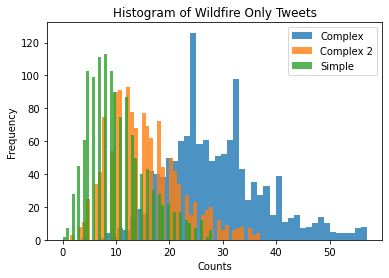

In [55]:
import matplotlib.pyplot as plt
plt.hist(complex_df['tweet_count'], bins=50, range=(0,np.percentile(complex_df['tweet_count'],95)), alpha=0.8, label="Complex")
plt.hist(complex_df_2['tweet_count'], bins=50, range=(0,np.percentile(complex_df_2['tweet_count'],95)), alpha=0.8, label="Complex 2")
# plt.hist(standard_df['tweet_count'], bins=50, range=(0,np.percentile(standard_df['tweet_count'],95)), alpha=0.8, label="Standard")
plt.hist(simple_df['tweet_count'], bins=50, range=(0,np.percentile(simple_df['tweet_count'],95)), alpha=0.8, label="Simple")
plt.title("Histogram of Wildfire Only Tweets")
plt.xlabel("Counts")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [4]:
# HMMMM...let's see if we can narrow in on looking at a very specific region.
words = [
    "wildfire",
    "(forest fire)"
]
query_term = "("+" OR ".join(words)+") -has:links -is:retweet has:geo point_radius:[-122.42 37.78 25mi] -has:media place_country:us"
searchQuery = TwitterSearchTerm(query_term, "2018-01-01T00:00:00z","2021-10-01T00:00:00z")
complex_df_2 = searchQuery.get_term_count()

Total tweets for query (wildfire OR (forest fire)) -has:links -is:retweet has:geo point_radius:[-122.42 37.78 25mi] -has:media place_country:us :
703


Standard
SF


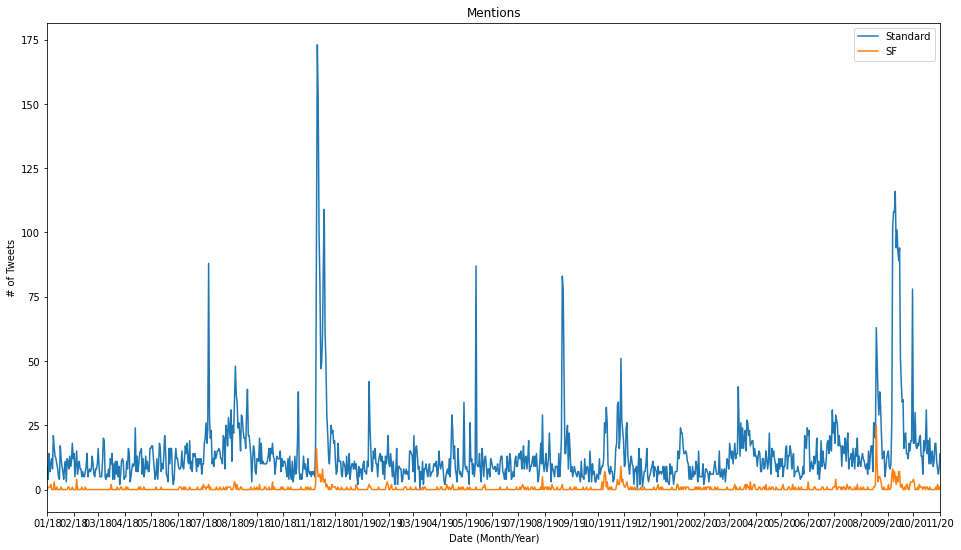

In [7]:
from datetime import datetime
import utils as ut
ut.graph_tweet_count([simple_df, complex_df_2],datetime(2018,1,1), datetime(2020,11,1), labels=['Standard', 'SF'])

SF


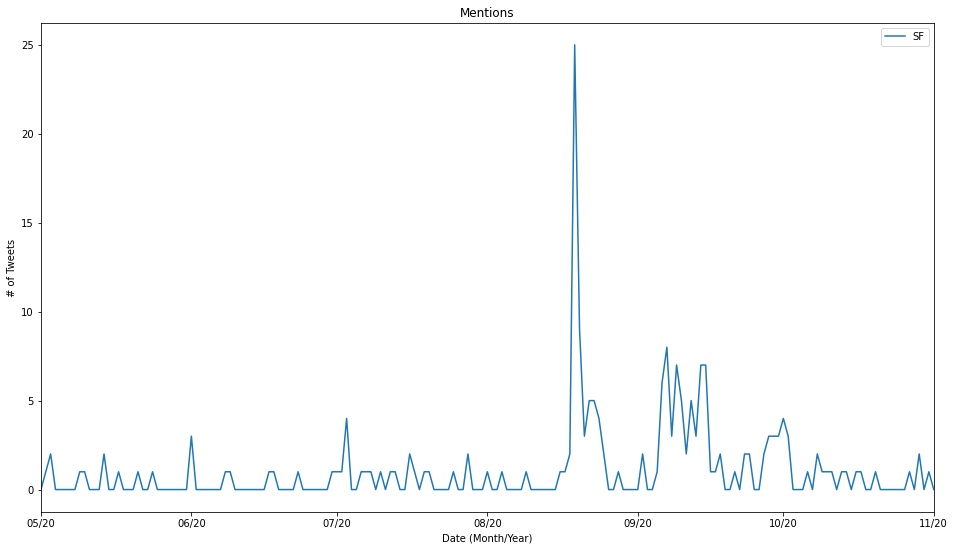

In [9]:
ut.graph_tweet_count([complex_df_2],datetime(2020,5,1), datetime(2020,11,1), labels=['SF'])

In [10]:
words = [
    "wildfire",
    "(forest fire)"
]
query_term = "("+" OR ".join(words)+") -has:links -is:retweet has:geo point_radius:[-122.42 37.78 25mi] -has:media place_country:us"
searchQuery = TwitterSearchTerm(query_term, "2020-08-01T00:00:00z","2020-10-01T00:00:00z")
specific_data = searchQuery.get_term_count()

Total tweets for query (wildfire OR (forest fire)) -has:links -is:retweet has:geo point_radius:[-122.42 37.78 25mi] -has:media place_country:us :
137


In [12]:
df = searchQuery.get_tweets()

Making request 1 of 1
The status is not 200. Response: 
<Response [429]>
Payload:
{'query': '(wildfire OR (forest fire)) -has:links -is:retweet has:geo point_radius:[-122.42 37.78 25mi] -has:media place_country:us', 'start_time': '2020-08-01T00:00:00z', 'end_time': '2020-10-01T00:00:00z', 'max_results': 500, 'tweet.fields': 'geo,created_at', 'expansions': 'geo.place_id', 'place.fields': 'geo,contained_within,country,full_name,name'}


RuntimeError: No active exception to reraise

In [14]:
df = searchQuery.get_tweets()

Making request 1 of 1
Query finished


In [15]:
df.head()

,id,text,geo,created_at,lat,lon
0,1311435238258532352,"Wildfire smoke in the city again. Grateful, of...",{'place_id': '5a110d312052166f'},2020-09-30T22:38:20.000Z,37.708075,-122.514926
1,1311188667751215104,Two of every three acres charred by fire this ...,{'place_id': '6890a27317bf4a9b'},2020-09-30T06:18:33.000Z,37.827626,-122.067214
2,1311138519859916802,"I was lost in the forest, seeking warmth, and ...",{'place_id': 'd70cebab5f549266'},2020-09-30T02:59:17.000Z,37.925263,-122.104336
3,1311059610627792896,Biden never even asked for the 30-minute break...,{'place_id': '5ef5b7f391e30aff'},2020-09-29T21:45:44.000Z,37.845953,-122.324818
4,1310982526341505025,@GarrisonMoratto @ianbremmer @GavinNewsom Ive ...,{'place_id': '00b2a7b60c2a6879'},2020-09-29T16:39:25.000Z,37.872039,-122.507602


In [18]:
# HMMMM...let's see if we can narrow in on looking at a very specific region.
# words = [
#     "sad"
# ]
query_term = "sad -has:links -is:retweet has:geo point_radius:[-122.42 37.78 25mi] -has:media place_country:us"
searchQuery_sad = TwitterSearchTerm(query_term, "2020-01-01T00:00:00z","2020-10-01T00:00:00z")
sad_query_count = searchQuery_sad.get_term_count()

Total tweets for query sad -has:links -is:retweet has:geo point_radius:[-122.42 37.78 25mi] -has:media place_country:us :
8947


Sad Query


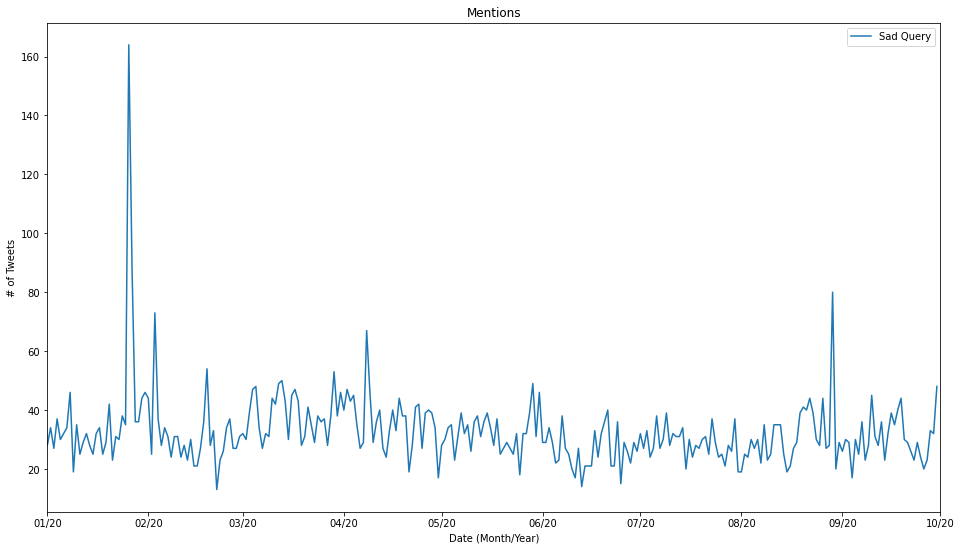

In [20]:
ut.graph_tweet_count([sad_query_count],datetime(2020,1,1), datetime(2020,10,1), labels=['Sad Query'])

In [11]:
words = [
    "wildfire",
    "(forest fire)"
]
query_term = "("+" OR ".join(words)+") -has:links -is:retweet has:geo point_radius:[-122.42 37.78 25mi] -has:media place_country:us"
searchQuery = TwitterSearchTerm(query_term, "2020-01-01T00:00:00z","2020-10-01T00:00:00z")
wf_sf_data = searchQuery.get_term_count()

Total tweets for query (wildfire OR (forest fire)) -has:links -is:retweet has:geo point_radius:[-122.42 37.78 25mi] -has:media place_country:us :
230


San Francisco
Sad Query
WF Data


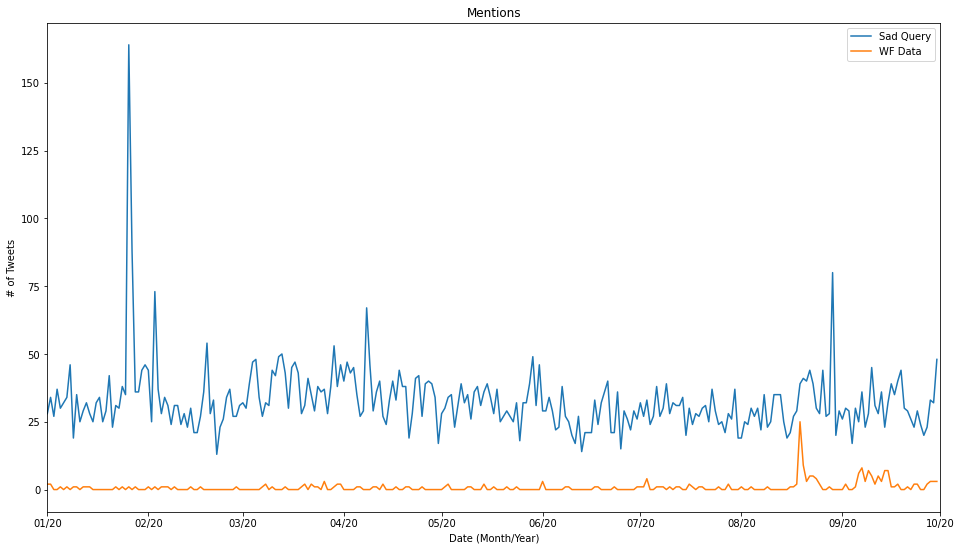

In [24]:
import matplotlib.pyplot as plt

print("San Francisco")
ut.graph_tweet_count([sad_query_count,wf_sf_data],datetime(2020,1,1), datetime(2020,10,1), labels=['Sad Query','WF Data'])


In [ ]:
# Boulder, Colorado

words = [
    "wildfire",
    "(forest fire)"
]
query_term = "("+" OR ".join(words)+") -has:links -is:retweet has:geo point_radius:[-122.42 37.78 25mi] -has:media place_country:us"
searchQuery = TwitterSearchTerm(query_term, "2020-01-01T00:00:00z","2020-10-01T00:00:00z")
wf_sf_data = searchQuery.get_term_count()




Total tweets for query (wildfire OR fire) -has:links -is:retweet has:geo point_radius:[-105.25 40.01 25mi] -has:media place_country:us :
1313
Total tweets for query (cough OR breathe OR asthma OR headache) -has:links -is:retweet has:geo point_radius:[-105.25 40.01 25mi] -has:media place_country:us :
485
Sad Query
WF Data


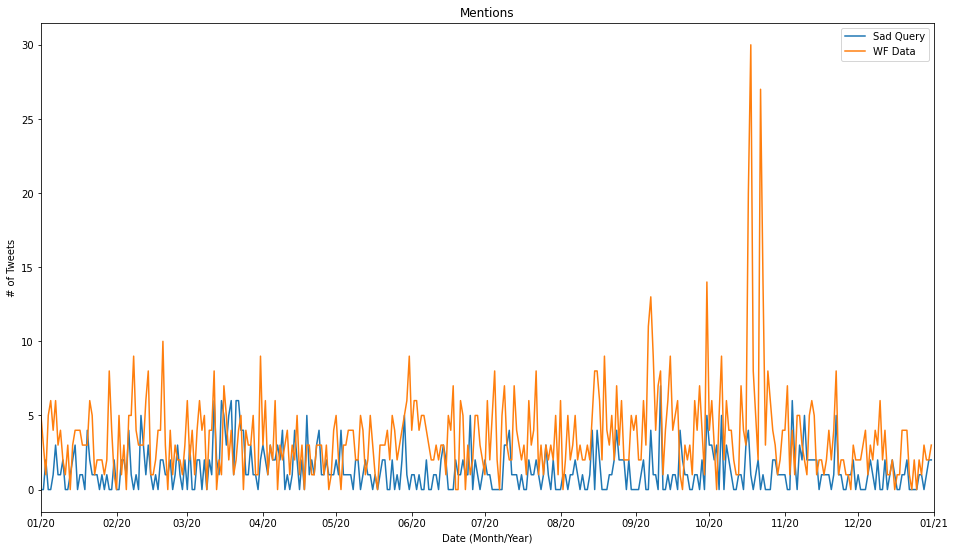

In [9]:
def plot_city(coords, start, end, dt_start, dt_end):
    wf_query = "(wildfire OR fire) -has:links -is:retweet has:geo point_radius:["+coords[0]+" "+coords[1]+" 50mi] -has:media place_country:us"
    searchQuery = TwitterSearchTerm(wf_query, start, end)
    wf_df = searchQuery.get_term_count()
    
    sad_query = "(cough OR breathe OR asthma OR headache) -has:links -is:retweet has:geo point_radius:["+coords[0]+" "+coords[1]+" 50mi] -has:media place_country:us"
    searchQuery = TwitterSearchTerm(sad_query, start, end)
    sad_df = searchQuery.get_term_count()
    
    ut.graph_tweet_count([sad_df,wf_df],dt_start, dt_end, labels=['Sad Query','WF Data'])

plot_city(['-105.25', '40.01'], "2020-01-01T00:00:00z", "2021-01-01T00:00:00z", datetime(2020,1,1), datetime(2021,1,1))
    

Large spike for Boulder, Colorado occurred around October 17, which is the day of the Calwood Fire...the largest-recorded in Boulder County.

Total tweets for query (wildfire OR fire) -has:links -is:retweet has:geo point_radius:[-122.42 37.78 25mi] -has:media place_country:us :
7867
Total tweets for query sad -has:links -is:retweet has:geo point_radius:[-122.42 37.78 25mi] -has:media place_country:us :
11396
Sad Query
WF Data


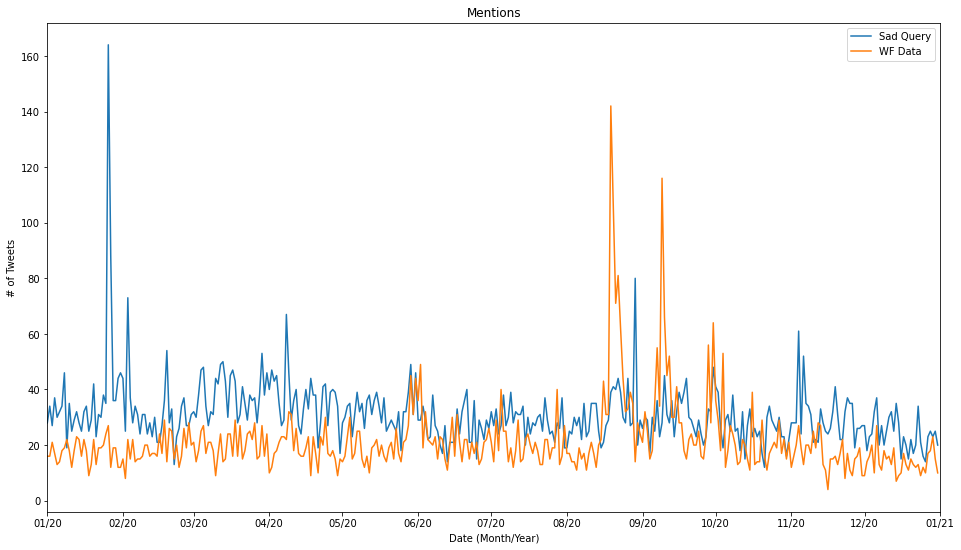

In [35]:
# San Francisco...more clearly now
plot_city(['-122.42','37.78'], "2020-01-01T00:00:00z", "2021-01-01T00:00:00z", datetime(2020,1,1), datetime(2021,1,1))


bounding_box:\[west_long south_lat east_long north_lat\]

Total tweets for query (cough OR breathe OR asthma OR headache OR sad OR lungs OR (eyes sting) OR depressed) -has:links -is:retweet has:geo point_radius:[-105.25 40.01 25mi] -has:media place_country:us :
3108
Sad Query


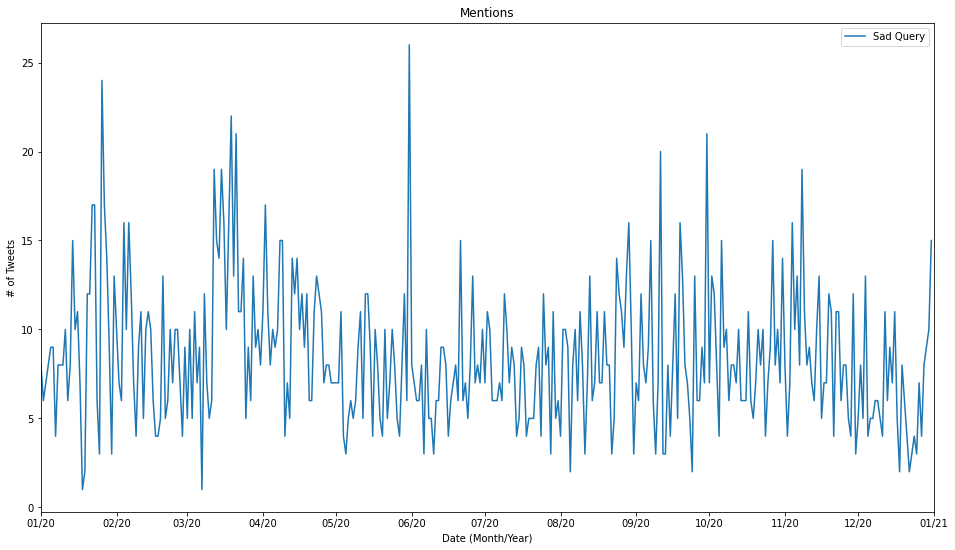

In [15]:
sad_query = "(cough OR breathe OR asthma OR headache OR sad OR lungs OR (eyes sting) OR depressed) -has:links -is:retweet has:geo point_radius:[-105.25 40.01 25mi] -has:media place_country:us"
searchQuery = TwitterSearchTerm(sad_query, "2020-01-01T00:00:00z", "2021-01-01T00:00:00z")
sad_df = searchQuery.get_term_count()

ut.graph_tweet_count([sad_df],datetime(2020,1,1), datetime(2021,1,1), labels=['Sad Query'])

# plot_city(['-105.25', '40.01'], "2020-01-01T00:00:00z", "2021-01-01T00:00:00z", datetime(2020,1,1), datetime(2021,1,1))